# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
In this project, we will be analyzing the data asscoicated with the patient showing up for medical appointments.

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

In each row, there are characteristics about the patient: ID, Gender, Chronic Disease , Nighborhood and wether the patient is enrolled in welfare program.

And some other characteristics about the appointment: Scheduled day, Appointment day, and wheather the patient recived a sms about the appointment or not.


### Questions for Analysis
The main question is: what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
but it can be breaked down into several smaller questions to find out the correlation between every characteristic and the output (Show or No show)

1- How does age affect the showing up?

2- How does gender affect the showing up?

3- How does chronic diseases affect the showing up?

4- How do diffrent neighborhoods differ with showing up?

5- Is there a correlation between reciving sms and showing up?

6- Is there a correlation between the appointment day and showing up?

7- Is being enrolled in the welfare program encorages the paitent to show up or not?

In [1]:
# Importing liberaries
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

As shown in the perivous cells: the dataset is consisted of 110527 records and 14 columns.

Columns related to Patient (9 Col.): 
- PatientID (unique for every patient)
- Patient Gender (Male/Female)
- Age
- Scholaship (Welfare enrolling status)
- Hypertension - Diabetes - Alcoholism - Handicap (Patient Chronic Conditions) %Missplied%
- Neighborhood (Patient place of living) %Missplied%

Columns related to Appointment (4 Col.):
- AppointmentID (unique for every appointment)
- ScheduledDay (The day which  the appointment was made)
- AppointmentDay (The day of the appointment)
- SMS_received (Wether sms was send to the paient about the appointment)

Output Column:
- No-show (Yes for not showing and no for showing)


### Assessing the Data 

First we need to check the columns datatype and null values:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As shown there are no missing data in the dataframe

Second, we need to check for duplicted records in the data: 

In [5]:
df.duplicated().sum()

0

There are no duplicated records in the data.

Now we can have a general look about the descriptive statistics of numerical data in the data set:

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.PatientId.nunique()

62299

In the summary statistics shown above, it shows that the majority of the patients do not suffer from a cronical disease (only 19% suffer from the hypertension - 7% suffer from diabetes). It also shows that only 2% is handicap and only 9% is enrolled in the walefare program.

The summary also shows that only 32% of the appointments have been notified by SMS.

The data has muliple records for the same patient (One patient, several appointments).

There is an anomaly in the age column, the minimun value of the column is -1. That could be a typo.
We will deal with it later on. The average age is 37 years old.

### Data Wrangling:

In [8]:
#Cheching for value of (-1) in the Age column:
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
#Deleting it:
df.drop(df[df.Age == -1].index, inplace=True)

Next, We can rename the column labels. For consistency and ease of referencing, we can make everything lowercase with no spaces nor dashes. Also we will correct the labels which are misspelled:

In [10]:
# replace daches with underscores and lowercase labels:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [11]:
#Renaming misspelled labels:
df.rename(columns={'hipertension':'hypertension'}, inplace= True)
df.rename(columns={'handcap':'handicap'}, inplace= True)

In [12]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Now we can remove irrelavent columns from the data which are (appointmentid, scheduledday)

In [13]:
# Removing irrelavent col.:
df.drop(['appointmentid', 'scheduledday'], axis=1, inplace=True)

In [14]:
df.head(1)

,patientid,gender,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Also we can append a new columns that transfers the appointmentday from datetime to day of the week:

In [15]:
#First Convert the string dtype to datetime format:
datetimes = pd.to_datetime(df['appointmentday'])
df['appointmentday'] = datetimes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
patientid         110526 non-null float64
gender            110526 non-null object
appointmentday    110526 non-null datetime64[ns]
age               110526 non-null int64
neighbourhood     110526 non-null object
scholarship       110526 non-null int64
hypertension      110526 non-null int64
diabetes          110526 non-null int64
alcoholism        110526 non-null int64
handicap          110526 non-null int64
sms_received      110526 non-null int64
no_show           110526 non-null object
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 11.0+ MB


In [16]:
#Then convert the datetime type to week of the day:
df['app_day_of_week'] = df['appointmentday'].dt.weekday_name

In [17]:
df.sample(10)

,patientid,gender,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,app_day_of_week
29207,6.764420e+13,F,2016-05-24,46,ROMÃO,0,1,1,0,0,0,No,Tuesday
24693,3.696536e+14,F,2016-05-31,40,ILHA DAS CAIEIRAS,0,0,0,0,0,0,No,Tuesday
107471,3.256129e+13,M,2016-06-07,63,JARDIM DA PENHA,0,0,0,0,0,0,No,Tuesday
75187,5.496458e+12,M,2016-05-06,0,NOVA PALESTINA,0,0,0,0,0,0,No,Friday
97639,3.969643e+12,F,2016-06-07,25,MÁRIO CYPRESTE,0,0,0,0,0,0,No,Tuesday
36994,1.489854e+10,M,2016-05-25,38,RESISTÊNCIA,0,0,0,0,0,1,No,Wednesday
67578,3.146520e+14,M,2016-05-03,9,MARUÍPE,0,0,0,0,0,0,No,Tuesday
66877,6.223377e+11,F,2016-05-30,46,JARDIM CAMBURI,0,1,0,0,0,1,Yes,Monday
42066,2.855322e+12,F,2016-05-04,50,SOLON BORGES,0,0,0,0,0,1,No,Wednesday
68581,6.252429e+14,M,2016-05-30,1,MARIA ORTIZ,0,0,0,0,0,0,No,Monday


In [18]:
#Then we can drop the old 'appointmentday' column:
df.drop(['appointmentday'], axis=1, inplace=True)

In [19]:
df.app_day_of_week.unique()

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'], dtype=object)

There is a bet of vagueness in the "no_show" column. Where the "Yes" record means the patient did not show, and the "No" record means the patient showed.

To clarify this, we will change the column label to "showed" and change the records in the columns as following: 
- "Yes" to 0 (false)
- "No" to 1 (true)

In [20]:
df.rename(columns={'no_show': 'showed'}, inplace= True)
df.replace({'showed': {'No': 1, 'Yes': 0}}, inplace = True)
df.head(1)

,patientid,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,app_day_of_week
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday


<a id='eda'></a>
## Exploratory Data Analysis

### One Variable analysis:

In this section we will investigate the correalation between one independent vairable (Age, chronic diseases, neighbourhoods, etc..) and the dependent varaible (Showing up rates)

First we can look at the distibution of the data in each column by looking at the histogram of each row:

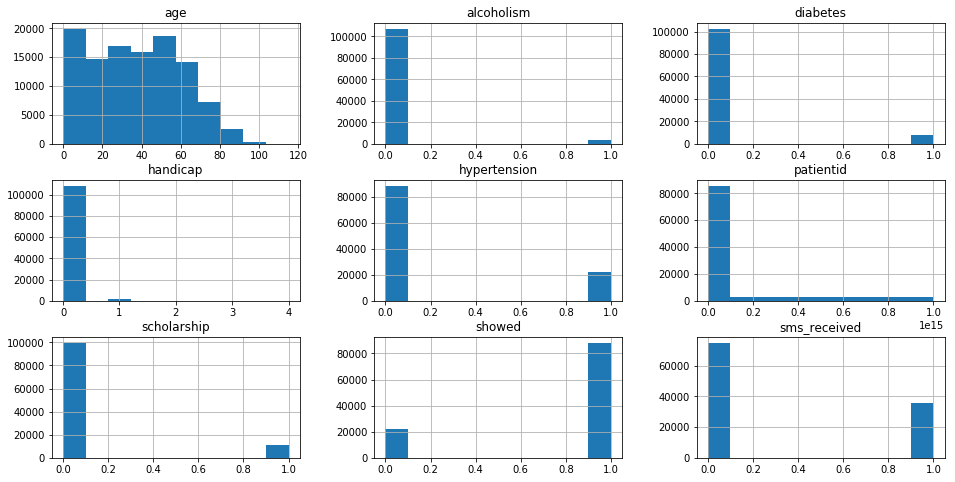

In [21]:
df.hist(figsize=(16,8));

In [22]:
#Creating 2 masks for Show - No show to compare them:
present = df.showed == True
absent = df.showed == False

### Q1: Does the age affect the showing up chances?

In [23]:
df.age[present].mean()

37.790504154999034

In [24]:
df.age[absent].mean()

34.317666562121957

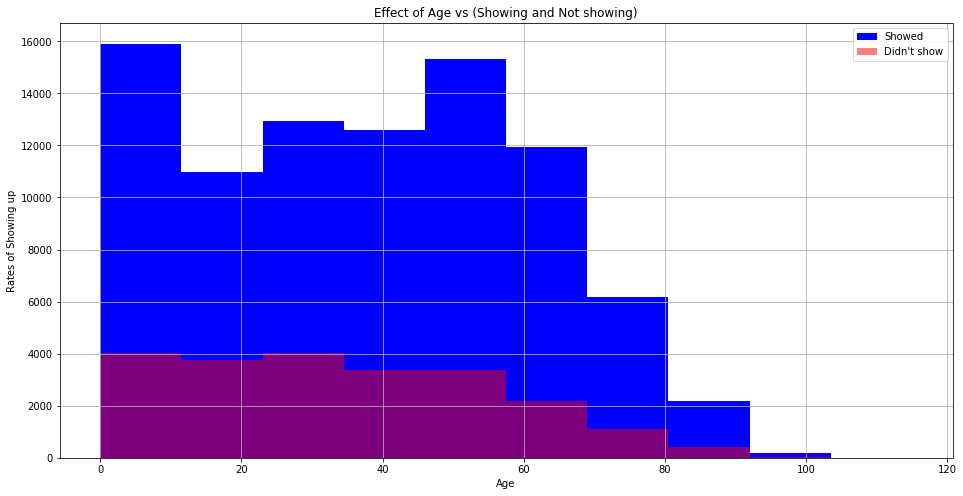

In [30]:
plt.figure(figsize=(16,8))
df.age[present].hist(alpha =1, bins=10, color='blue', label = 'Showed')
df.age[absent].hist(alpha = 0.5, bins=10, color='red', label = "Didn't show")
plt.legend()
plt.title('Effect of Age vs (Showing and Not showing)')
plt.xlabel('Age')
plt.ylabel('Rates of Showing up');

As shown in the histogram above, the showing up highest rates exists in to ranges (0 - 10) years old and (45 - 58) years old.

And the showing up rates starts to drop dramatically statrting from age of 58 till it reaches its lowest rates at ages above 90 years old.

This can be justified that the children are being taken care of by the parents very well and the mid age adults are mindful about their health. But the elders need some help to go to their medical appointments

### Q2: Does having cronic diseases affect the showing up chances?

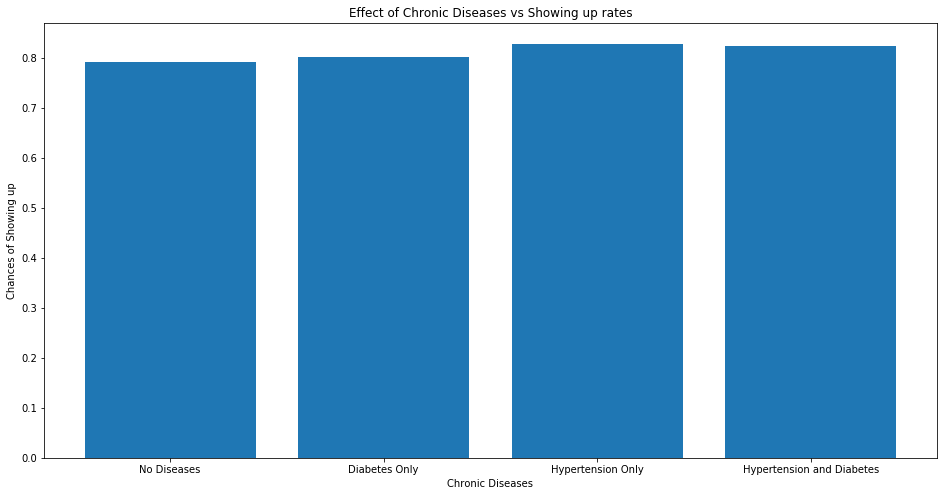

In [27]:
# Create a bar chart with proper labels
plt.figure(figsize=(16,8))
locations = [1,2,3,4]
heights = df.groupby(['hypertension','diabetes']).showed.mean()
labels = ['No Diseases','Diabetes Only', 'Hypertension Only', 'Hypertension and Diabetes']

plt.bar(locations, heights, tick_label=labels)
plt.title('Effect of Chronic Diseases vs Showing up rates')
plt.xlabel('Chronic Diseases')
plt.ylabel('Chances of Showing up');

As shown in the previous bar chart, there is no clear coorelation between having chronic diseases and showing up.

### Q3: Does suffreing from a handicap affect the showing up chances?

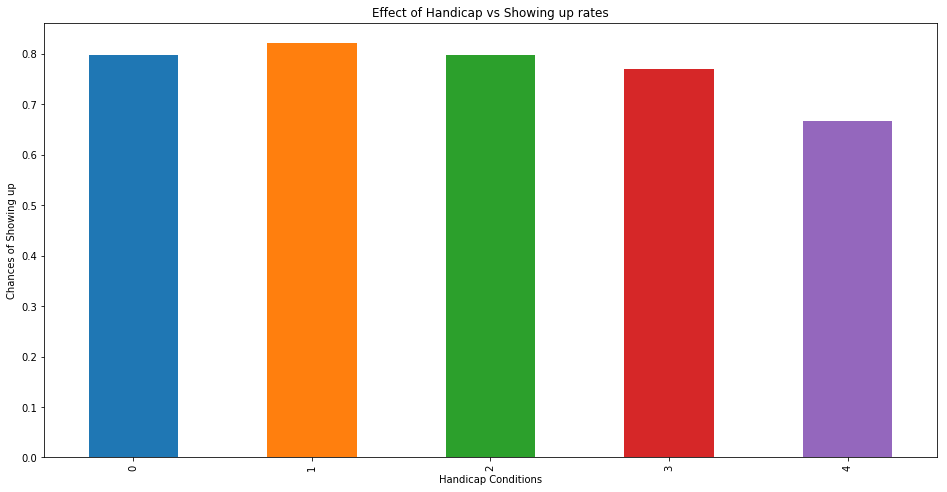

In [28]:
plt.figure(figsize=(16,8))
df.groupby('handicap').showed.mean().plot(kind= 'bar')
plt.title('Effect of Handicap vs Showing up rates')
plt.xlabel('Handicap Conditions')
plt.ylabel('Chances of Showing up');

There is no clear corrolation between having a handicap and the rates of showing up. Although the records of "4" show slight drop of showing up.

### Q3: Does gender affects the showing up rates?

In [29]:
#Pie chart plotting Function:
def piechartplot(col_name,pl_label, pl_title1, pl_title2):
    """
    Input: column name, label of the pie chart, title of the showing mask, title of the not showing mask
    Ouptput: 2 Pie Charts side by side
    
    """
    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    df[col_name][present].value_counts().plot(kind='pie', colors=['red','blue'])
    plt.ylabel(pl_label)
    plt.title(pl_title1);

    plt.subplot(1,2,2)
    df[col_name][absent].value_counts().plot(kind='pie',colors=['red','blue'])
    plt.ylabel(pl_label)
    plt.title(pl_title2);

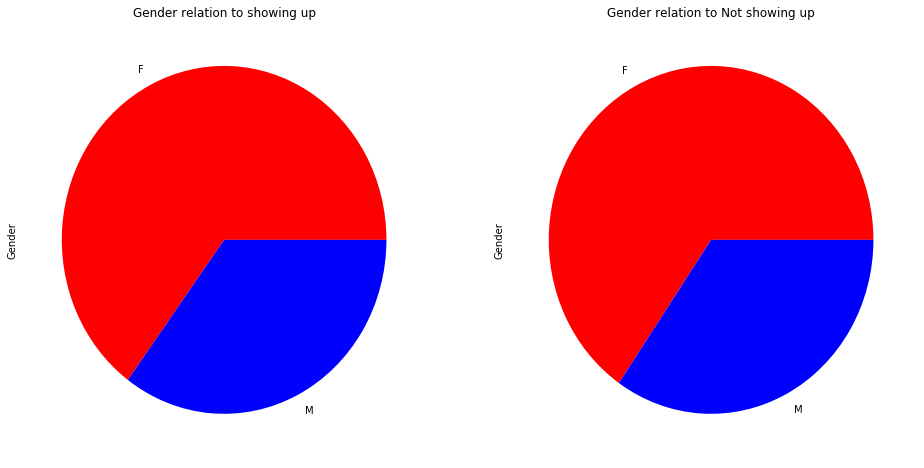

In [30]:
piechartplot('gender', 'Gender','Gender relation to showing up','Gender relation to Not showing up')

The two pie charts representing the showing and not showing data are almost identical. There is no clear correlation between gender and showing for the appointments.

### Q4: Does receiving  SMS notification affects the showing up rates?


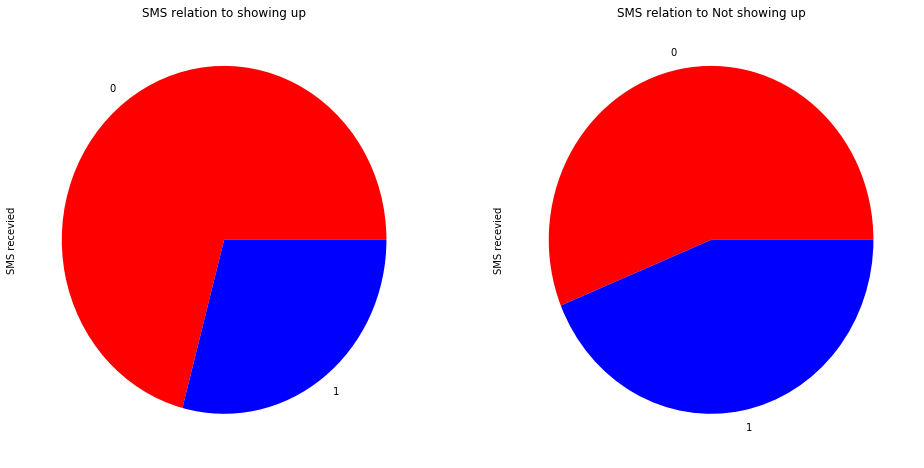

In [31]:
piechartplot('sms_received', 'SMS recevied','SMS relation to showing up','SMS relation to Not showing up')

The pie charts shows that showing that, the majority of the paitents that showed up did not received sms notification. Odd enough the paitents that did not show has recevied sms notification more.

### Q5: Does being enrolled in the walefare affects the showing up rates?

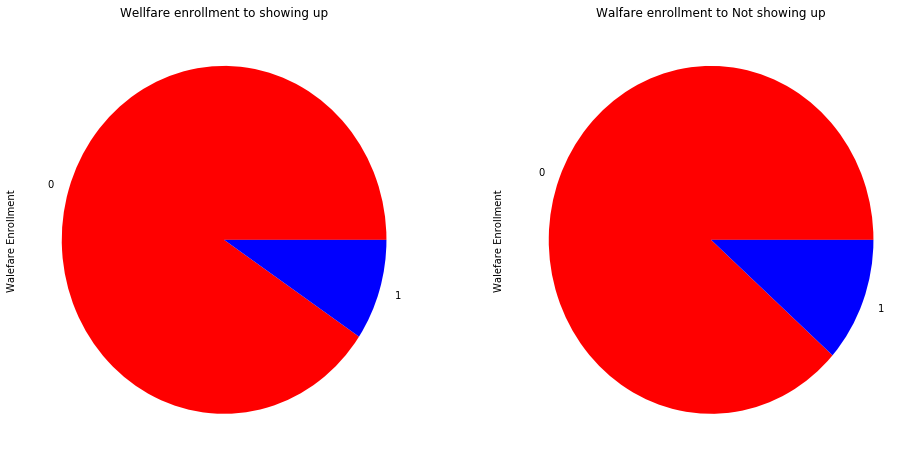

In [32]:
piechartplot('scholarship', 'Walefare Enrollment','Wellfare enrollment to showing up','Walfare enrollment to Not showing up')

The two pie charts representing the showing and not showing data are almost identical. There is no clear correlation between welfare program enrollment and showing for the appointments.

### Q6: Does neighborhood affect the showing up rates?

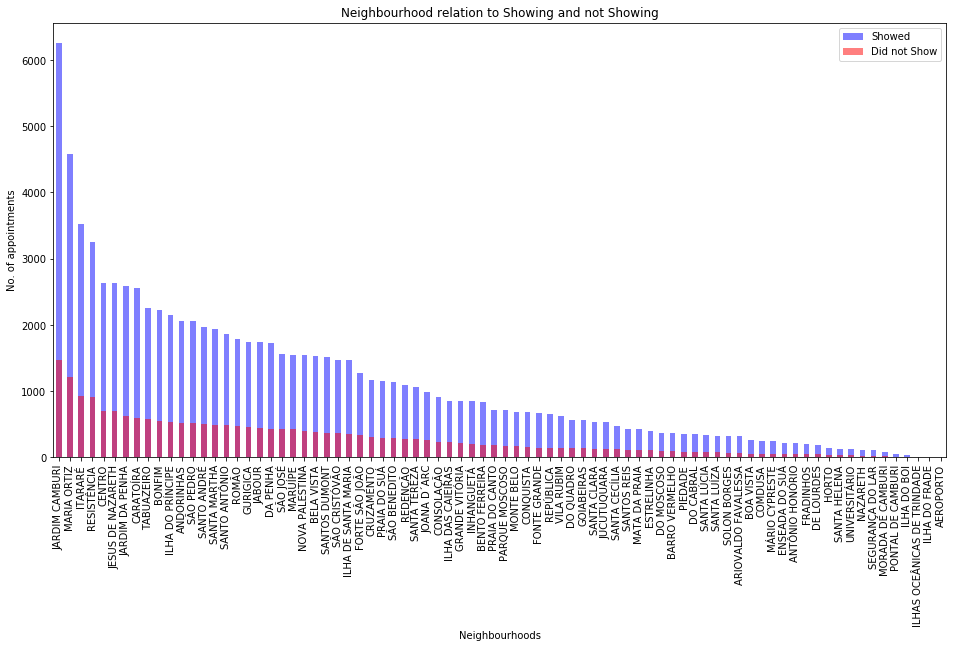

In [33]:
plt.figure(figsize=(16,8))
df.neighbourhood[present].value_counts().plot(alpha=0.5, kind='bar', color='blue', label='Showed')
df.neighbourhood[absent].value_counts().plot(alpha=0.5, kind='bar', color='red', label='Did not Show')
plt.title('Neighbourhood relation to Showing and not Showing')
plt.xlabel('Neighbourhoods')
plt.ylabel('No. of appointments')
plt.legend();

The bar chart shows that the show rate is related to the neighbourhood. However, the number of appointments not showed is also corrleated to the show rate. This could mean that some neighbourhoods needs more attention regarding the health awareness and increasing the accessibility to more health facilites.

### Q7: Does the appointment day of the week affect the showing up rates?

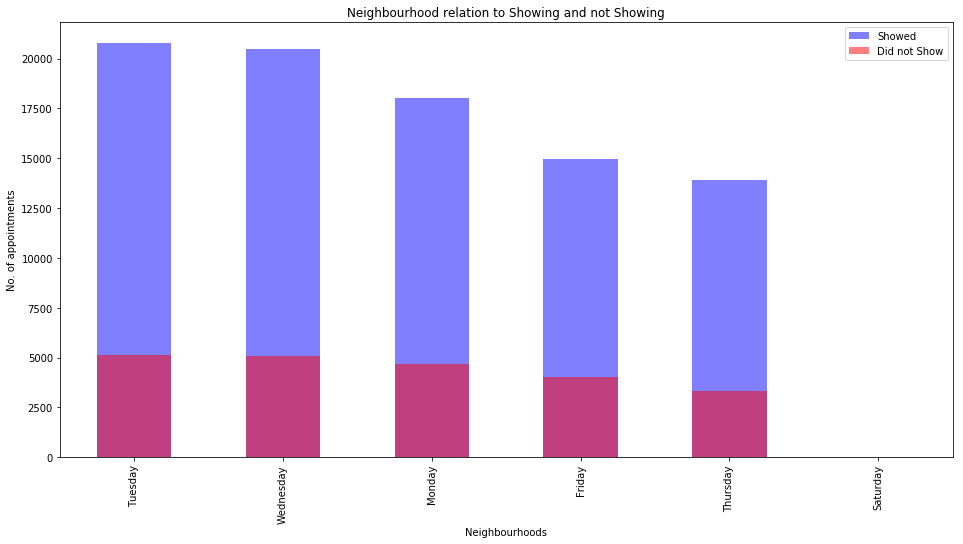

In [34]:
plt.figure(figsize=(16,8))
df.app_day_of_week[present].value_counts().plot(alpha=0.5, kind='bar', color='blue', label='Showed')
df.app_day_of_week[absent].value_counts().plot(alpha=0.5, kind='bar', color='red', label='Did not Show')
plt.title('Neighbourhood relation to Showing and not Showing')
plt.xlabel('Neighbourhoods')
plt.ylabel('No. of appointments')
plt.legend();

There is a correlation between the appointment day of the week and show up rates. Tuesday and Wednesday have a higher show up rate than the rest of the week days

### Multi-Variable analysis:

In this section we will investigate the correalation between two independent vairable and how they togeather affect the dependent varaible.

### Q8: Do age and gender (together) affect the show rate?

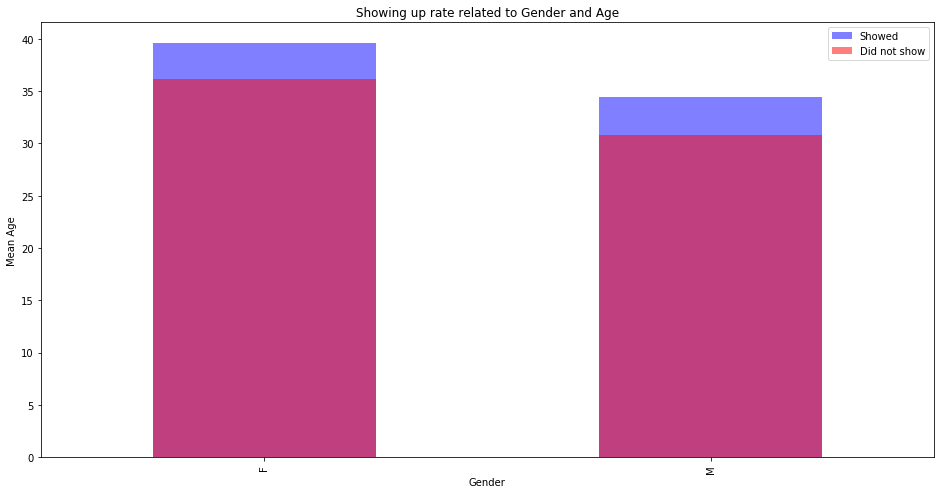

In [48]:
plt.figure(figsize= (16,8))
df[present].groupby('gender').age.mean().plot(alpha=0.5, kind='bar', color='blue', label='Showed')
df[absent].groupby('gender').age.mean().plot(alpha=0.5,kind='bar', color='red', label='Did not show')
plt.legend()
plt.xlabel('Gender')
plt.ylabel('Mean Age')
plt.title('Relation of showing up based on age and gender Combined');

In [45]:
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

Although the female mean age of showing up is slightly higher than males There is no clear correlation of age and gender combined with the rate of showing up. This higher values, may be related to more females in the dataset

### Q9: Do neighbourhood and sms (together) related to showing up rates:

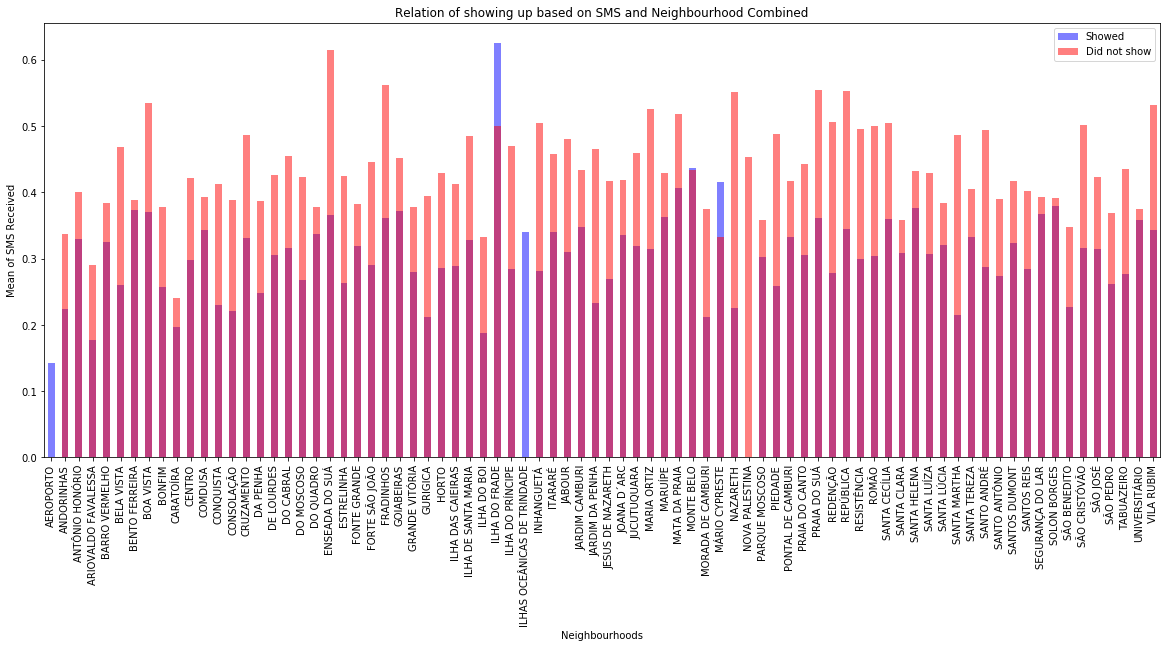

In [54]:
plt.figure(figsize= (20,8))
df[present].groupby('neighbourhood').sms_received.mean().plot(alpha=0.5, kind='bar', color='blue', label='Showed')
df[absent].groupby('neighbourhood').sms_received.mean().plot(alpha=0.5,kind='bar', color='red', label='Did not show')
plt.title('Relation of showing up based on SMS and Neighbourhood Combined')
plt.legend()
plt.xlabel('Neighbourhoods')
plt.ylabel('Mean of SMS Received');

The most effictive SMS noticfications was in Aeroporto and Ilhas Oceaincas de Trinadade

<a id='conclusions'></a>
## Conclusions

Based on the EDA above, we can conclude:
- The Age of the paitents has correlation to showing up rates. There are 2 peaks at (0 - 10) years old and (45 - 58) years old. And bottom at age > 90 years old. 
- The SMS notifications are not efficient at all. The patients are showing with less SMS and not showing with more SMS. 
- The neighborhoods are related to showing up rates. Some neighborhoods have a greater show up than others.
- Appointment weekday is related to showing up rates. Tuesday and Wednesday are the best days for showing up results.
- Aeroporto and Ilhas Oceaincas de Trinadade were the most responive neighborhoods in terms of sms notifications.
- Gender, chronic disease, handicap and enrollment in walfare program have no clear correlation with the showing up rates.



### Limitations
This analysis was performed from the prespective of the appointments. Not taking into consideration that some appointments are reserve 

